In [3]:
import uproot
import pandas as pd
import numpy as np
import glob


In [4]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.style.use('belle2')

import os

In [5]:
import glob

base_path = "/share/storage/jykim/storage_b2/storage/reduced_ntuples/MC15rd/etapip_eteeta/MC15rd_etaetapip_loose_v2_241115_MC15rd_weight_q_s"
cm_elements = ["15rd_eta_e7_18_4S_v3", "15rd_eta_e20_b26_v1", "15rd_eta_e20_e26_4S_v2", "15rd_eta_e21_5S_scan_v1", "15rd_eta_mori_off_v1"]

file_list = []
for element in cm_elements:
    pattern = f"{base_path}/{element}/*.root"
    file_list += glob.glob(pattern)


dataframes = []
branches_all = ["__experiment__", "__run__", "__event__",\
             'Dp_M','Dp_isSignal','Dp_CMS_p','Dp_cosAngleBetweenMomentumAndVertexVector','Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'Dp_acos_cosAngleBetweenMomentumAndVertexVector','Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'etapip_Eta_M','etapip_Eta_isSignal','etapip_Eta_daughterDiffOfPhi_0_1','etapip_Eta_daughterAngle_0_1','etapip_Eta_Easym','etapip_Eta_p',\
             'etapip_Eta_genMotherPDG','etapip_Eta_genMotherID','etapip_gamma1_p','etapip_gamma2_p','etapip_gamma1_clusterNHits','etapip_gamma2_clusterNHits',\
             'etapip_gamma1_clusterReg', 'etapip_gamma2_clusterReg',\
             'Pip_pionID','Pip_pionIDNN','Pip_mcPDG','Pip_dr','Pip_dr','Pip_p',\
             'Pip_genMotherPDG','Pip_genMotherID',\
             'ROE_Mgg','dM_pi0','ROE_Mgg_50MeV','dM_pi0_50MeV','ROE_Mgg_75MeV','dM_pi0_75MeV','ROE_Mgg_mask','dM_pi0_mask',\
             'ROE_Mgg_2','dM_pi0_2','ROE_Mgg_50MeV_2','dM_pi0_50MeV_2','ROE_Mgg_75MeV_2','dM_pi0_75MeV_2','ROE_Mgg_mask_2','dM_pi0_mask_2',\
             'veto_isSignal','veto_isSignal_50MeV','veto_isSignal_75MeV','veto_isSignal_mask',\
             'num_Dstar','num_Dstar_no_nan','CFT_qr','CFT_prob']
# Process each file
for file_name in file_list:
    # Load the ROOT file and tree
    file = uproot.open(file_name)
    tree = file["etapip_pipipi_K"]

    # Specify the branches you want to extract
    branches = ['Pip_pionID','Dp_Psum','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum','Pip_dr',"Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan",]  # Replace with actual branch names

    # Convert the selected branches to a Pandas DataFrame
    df_temp = tree.arrays(branches, library="pd")
    # df_temp = tree.arrays(library="pd")

    # Append the DataFrame to the list
    dataframes.append(df_temp)

# Concatenate all DataFrames into a single DataFrame
df_bkg = pd.concat(dataframes, ignore_index=True)

df_bkg = df_bkg.query('Dp_isSignal!=1')
df_bkg = df_bkg.query('(Pip_genMotherID!=etapip_Eta_genMotherID) | abs(Pip_genMotherPDG)!=431 | abs(etapip_Eta_genMotherPDG)!=431')

In [6]:
# df_bkg = df_bkg.query('num_Dstar_no_nan>0')
df_bkg = df_bkg.query('Pip_pionID<0.01')

In [7]:
df_bkg.describe()

,Pip_pionID,Dp_Psum,Pip_genMotherID,etapip_Eta_genMotherID,Pip_genMotherPDG,etapip_Eta_genMotherPDG,Dp_cosHelicityAngleMomentum,Pip_dr,Dp_isSignal,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,Pip_p,Dp_CMS_p,etapip_Eta_p,CFT_prob,Dp_M,num_Dstar_no_nan
count,1.249047e+06,1.249047e+06,1.249047e+06,1.249047e+06,1.249047e+06,1.249047e+06,1.249047e+06,1.249047e+06,1096386.0,1.249047e+06,1.249047e+06,1.249047e+06,1.249047e+06,1.249047e+06,1.249047e+06,1.249047e+06
mean,5.043140e-04,3.546842e+00,7.144092e+00,2.369002e+00,6.206876e+02,2.259341e+03,-1.653861e-01,7.986844e-03,0.0,1.667609e-01,1.524806e+00,3.052210e+00,2.022036e+00,5.046141e-01,1.811224e+00,-9.546670e-01
std,1.560945e-03,6.609205e-01,7.757301e+00,4.385602e+00,7.426295e+04,9.893277e+04,6.682594e-01,2.999742e-02,0.0,9.444336e-01,1.060062e+00,4.801225e-01,1.022998e+00,3.150322e-01,1.428090e-01,3.060791e-01
min,0.000000e+00,1.999948e+00,0.000000e+00,0.000000e+00,-9.000211e+06,-9.000211e+06,-9.999964e-01,4.693386e-09,0.0,-1.000000e+00,6.055104e-02,2.500000e+00,4.000000e-01,4.163384e-04,1.600001e+00,-1.000000e+00
25%,2.354169e-17,3.062432e+00,2.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,-8.044134e-01,1.073243e-03,0.0,-9.934699e-01,5.746259e-01,2.676437e+00,1.056432e+00,2.101240e-01,1.685450e+00,-1.000000e+00
50%,5.264947e-09,3.485730e+00,3.000000e+00,0.000000e+00,2.300000e+01,0.000000e+00,-3.675721e-01,2.464471e-03,0.0,9.480392e-01,1.256591e+00,2.918945e+00,2.106348e+00,5.045641e-01,1.792558e+00,-1.000000e+00
75%,3.039786e-05,3.926925e+00,9.000000e+00,2.000000e+00,2.230000e+02,2.300000e+01,5.296412e-01,5.591221e-03,0.0,9.993227e-01,2.346470e+00,3.304553e+00,2.798917e+00,7.991322e-01,1.926716e+00,-1.000000e+00
max,9.999814e-03,2.470336e+01,9.400000e+01,6.300000e+01,9.010221e+06,9.030221e+06,9.999749e-01,9.993085e-01,0.0,1.000000e+00,2.225999e+01,1.890723e+01,6.555417e+00,9.996668e-01,2.100000e+00,4.000000e+00


In [8]:
nan_columns = df_bkg.isnull().any()
print(nan_columns)

Pip_pionID                                            False
Dp_Psum                                               False
Pip_genMotherID                                       False
etapip_Eta_genMotherID                                False
Pip_genMotherPDG                                      False
etapip_Eta_genMotherPDG                               False
Dp_cosHelicityAngleMomentum                           False
Pip_dr                                                False
Dp_isSignal                                            True
Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane    False
Pip_p                                                 False
Dp_CMS_p                                              False
etapip_Eta_p                                          False
CFT_prob                                              False
Dp_M                                                  False
num_Dstar_no_nan                                      False
dtype: bool


In [9]:
base_path_sig = "/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15rd_sigMC"
elements_sig = ["DptoetaKp_pipipi", "DptoetaKp_pipipi_cc"]
project_name = "241114_loose_v2"

file_list_sig = []
for element in elements_sig:
    pattern = f"{base_path_sig}/{element}/{project_name}/*.root"
    file_list_sig += glob.glob(pattern)
# print(file_list_sig)



In [10]:
dataframes_signal = []
for file_name in file_list_sig:
    # Load the ROOT file and tree
    file = uproot.open(file_name)
    tree = file["etapip_pipipi_K"]

    # Specify the branches you want to extract
    # branches = ['Dp_Psum','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum',"Pip_dr","Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan",]  # Replace with actual branch names
    branches = ['Pip_pionID','Dp_Psum','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum',"Pip_dr","Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan",]  # Replace with actual branch names

    # Convert the selected branches to a Pandas DataFrame
    df_temp = tree.arrays(branches, library="pd")
    # df_temp = tree.arrays(library="pd")

    # Append the DataFrame to the list
    dataframes_signal.append(df_temp)


df_signal = pd.concat(dataframes_signal, ignore_index=True)
df_signal = df_signal.query('Dp_isSignal==1')

In [11]:
# df_signal = df_signal.query('num_Dstar_no_nan>0')
df_signal = df_signal.query('Pip_pionID<0.01')

In [12]:
df_signal.describe()

,Pip_pionID,Dp_Psum,Pip_genMotherID,etapip_Eta_genMotherID,Pip_genMotherPDG,etapip_Eta_genMotherPDG,Dp_cosHelicityAngleMomentum,Pip_dr,Dp_isSignal,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,Pip_p,Dp_CMS_p,etapip_Eta_p,CFT_prob,Dp_M,num_Dstar_no_nan
count,3.548040e+05,354804.000000,354804.000000,354804.000000,354804.000000,354804.000000,354804.000000,3.548040e+05,354804.0,354804.000000,354804.000000,354804.000000,354804.000000,354804.000000,354804.000000,354804.000000
mean,3.877328e-04,3.897322,9.460880,9.460880,3.083624,3.083624,-0.253084,2.309886e-02,1.0,0.924034,1.532053,3.369607,2.365269,0.502329,1.868368,-0.686776
std,1.357231e-03,0.724898,5.446024,5.446024,410.989011,410.989011,0.489801,3.107936e-02,0.0,0.364089,0.876081,0.563567,0.881322,0.318106,0.010643,0.744169
min,0.000000e+00,2.161271,3.000000,3.000000,-411.000000,-411.000000,-0.999989,1.467809e-07,1.0,-1.000000,0.087748,2.500001,0.400155,0.000875,1.600248,-1.000000
25%,4.643503e-15,3.365035,6.000000,6.000000,-411.000000,-411.000000,-0.680567,4.659942e-03,1.0,0.999588,0.817849,2.898331,1.726051,0.201452,1.864951,-1.000000
50%,5.256017e-09,3.820214,8.000000,8.000000,411.000000,411.000000,-0.312298,1.276559e-02,1.0,0.999963,1.413698,3.302493,2.337857,0.500000,1.868842,-1.000000
75%,1.232331e-05,4.358852,12.000000,12.000000,411.000000,411.000000,0.118328,2.969913e-02,1.0,0.999997,2.088266,3.781414,2.957412,0.803236,1.872555,-1.000000
max,9.997642e-03,7.092695,55.000000,55.000000,411.000000,411.000000,0.997298,9.560540e-01,1.0,1.000000,5.708853,5.222542,6.026983,0.998895,2.085091,5.000000


In [13]:
nan_columns = df_signal.isnull().any()
print(nan_columns)

Pip_pionID                                            False
Dp_Psum                                               False
Pip_genMotherID                                       False
etapip_Eta_genMotherID                                False
Pip_genMotherPDG                                      False
etapip_Eta_genMotherPDG                               False
Dp_cosHelicityAngleMomentum                           False
Pip_dr                                                False
Dp_isSignal                                           False
Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane    False
Pip_p                                                 False
Dp_CMS_p                                              False
etapip_Eta_p                                          False
CFT_prob                                              False
Dp_M                                                  False
num_Dstar_no_nan                                      False
dtype: bool


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Ensure the signal and background datasets are balanced
min_size = min(len(df_signal), len(df_bkg))

# Sample an equal number of rows from both signal and background
df_signal_balanced = df_signal.sample(n=min_size, random_state=42)
df_bkg_balanced = df_bkg.sample(n=min_size, random_state=42)

# Assign labels: signal=1, background=0
df_signal_balanced['label'] = 1
df_bkg_balanced['label'] = 0

# Concatenate the signal and background datasets
df_combined = pd.concat([df_signal_balanced, df_bkg_balanced], ignore_index=True)

# Shuffle the combined dataset
df_combined = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)

# Drop the specified columns
columns_to_drop = ['Pip_pionID','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_isSignal','Dp_CMS_p','CFT_prob', 'Dp_M', 'Pip_p', 'etapip_Eta_p', 'num_Dstar_no_nan'] 
                   # 'etapip_Eta_daughterDiffOfPhi_0_1', 'etapip_Eta_daughterAngle_0_1']
df_combined = df_combined.drop(columns=columns_to_drop)


In [15]:
df_combined.describe()

,Dp_Psum,Dp_cosHelicityAngleMomentum,Pip_dr,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,label
count,709608.000000,709608.000000,7.096080e+05,709608.000000,709608.0
mean,3.722443,-0.208971,1.553699e-02,0.545289,0.5
std,0.715534,0.587409,3.141760e-02,0.809780,0.5
min,1.999948,-0.999995,1.132763e-08,-1.000000,0.0
25%,3.200702,-0.747582,1.786458e-03,0.804293,0.0
50%,3.644894,-0.329301,5.143119e-03,0.999494,0.5
75%,4.151561,0.298389,1.657893e-02,0.999984,1.0
max,24.703363,0.999808,9.973341e-01,1.000000,1.0


In [16]:
plt.rcParams['font.family'] = 'DejaVu Sans'


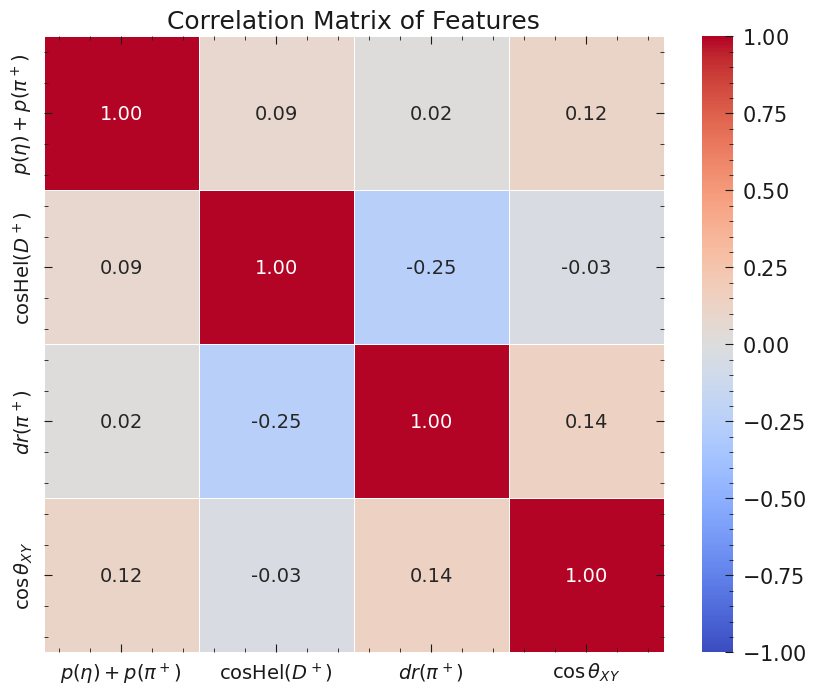

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
# plt.rcParams['text.usetex'] = True

# # Rename the features
feature_names = {
    'Pip_dr': r'$dr(\pi^+)$',
    'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane': r'$\cos \theta_{XY}$',
    'Dp_Psum': r'$p(\eta)+p(\pi^+)$',
    'Dp_cosHelicityAngleMomentum': r'cosHel$(D^+)$'
}

# # Apply the renaming
df_combined.rename(columns=feature_names, inplace=True)

# Compute the correlation matrix
corr_matrix = df_combined.drop(columns=['label']).corr()

plt.rcParams['font.family'] = 'DejaVu Sans'

# Plot the correlation matrix with larger annotation text
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, 
            vmin=-1, vmax=1,  # Set the limits of the colormap
            xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, 
            annot_kws={"size": 14})  # Increase the size of the correlation numbers

# Set the title and label sizes
plt.title('Correlation Matrix of Features', fontsize=18)  # Title size
plt.xticks(fontsize=14)  # X-axis label size
plt.yticks(fontsize=14)  # Y-axis label size

# # Ensure the path is expanded correctly
# save_path = os.path.expanduser('~/PLOTS/DNN/belle2_etapip_gg_correlation_240919_coshel_momentum.png')

# plt.tight_layout()
# # Save the figure
# plt.savefig(save_path)
plt.savefig("MC15rd_etapip_pipipi_K_corr_loose_v2.png")

plt.show()


In [20]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X = df_combined.drop(columns='label')
y = df_combined['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# import joblib
# model_file = "best_xgb_model_etapip_pipipi.pkl"
# best_xgb_model = joblib.load(model_file)

In [22]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Separate features and target
X = X_train
y = y_train

# Define the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1
)

# Perform the grid search
grid_search.fit(X, y)



# Get the best model and its parameters
best_xgb_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Save the best model if needed
import joblib
joblib.dump(best_xgb_model, 'MC15rd_best_xgb_model_etapip_pipipi_K_loose_v2.pkl')


# xgb_model.fit(X,y)
# best_xgb_model = xgb_model


Fitting 5 folds for each of 108 candidates, totalling 540 fits


/home/jykim/anaconda3/envs/draw/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/jykim/anaconda3/envs/draw/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/jykim/anaconda3/envs/draw/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.8301754825576279


['MC15rd_best_xgb_model_etapip_pipipi_K_loose_v2.pkl']

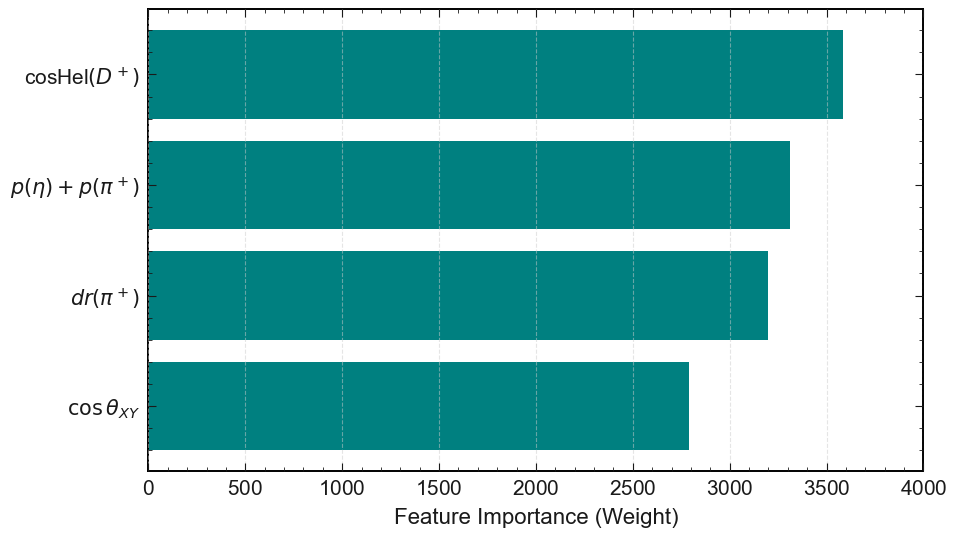

In [23]:
# Extract the underlying Booster object from the trained XGBClassifier
booster = best_xgb_model.get_booster()

# Get the feature importances with 'weight'
importance_dict = booster.get_score(importance_type='weight')

# The rest of the code remains the same
import pandas as pd

# Rename the features for display
feature_names = {
    'Pip_dr': r'$dr(\pi^+)$',
    'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane': r'$\cos \theta_{XY}$',
    'Dp_Psum': r'$p(\eta)+p(\pi^+)$',
    'Dp_cosHelicityAngleMomentum': r'cosHel$(D^+)$'
}

# Convert to a DataFrame for easier manipulation
importance_df = pd.DataFrame.from_dict(importance_dict, orient='index', columns=['Weight'])
importance_df.index = [feature_names.get(f, f) for f in importance_df.index]  # Rename using LaTeX labels
importance_df = importance_df.sort_values(by='Weight', ascending=False)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df.index, importance_df['Weight'], color='teal')
plt.xlabel('Feature Importance (Weight)', fontsize=16)
# plt.title('Feature Importances with Customized Labels', fontsize=14)
plt.gca().invert_yaxis()  # Show the most important feature on top
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.savefig("MC15rd_etapip_pipipi_K_importance_loose_v2.png")

# Show plot
plt.show()

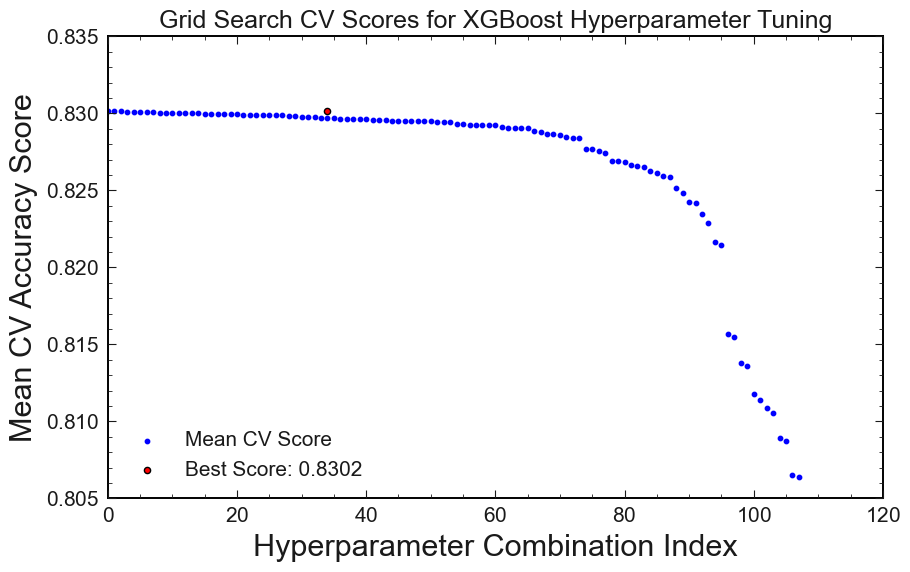

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract all mean cross-validation scores and parameter combinations
results_df = pd.DataFrame(grid_search.cv_results_)
# results_df = pd.DataFrame(random_search.cv_results_)


# Sort results by mean test score in descending order
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Highlight the best score
best_score = grid_search.best_score_
# best_score = random_search.best_score_

# Plotting the scores using Matplotlib
plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(
    range(len(results_df)),
    results_df['mean_test_score'],
    c='blue',  # Color for the points
    s=10,
    marker='o',
    label='Mean CV Score'
)

# Highlighting the best score
best_index = results_df['mean_test_score'].idxmax()
plt.scatter(best_index, best_score, color='red', s=20, label=f'Best Score: {best_score:.4f}', edgecolor='black')

# Adding labels and legend
plt.title("Grid Search CV Scores for XGBoost Hyperparameter Tuning")
plt.xlabel("Hyperparameter Combination Index")
plt.ylabel("Mean CV Accuracy Score")
plt.legend(loc="lower left")
plt.xlim(0,)
# Save the figure
plt.savefig("MC15rd_etapip_pipipi_K_gridsearch_loose_v2.png")

# Show the plot
plt.show()


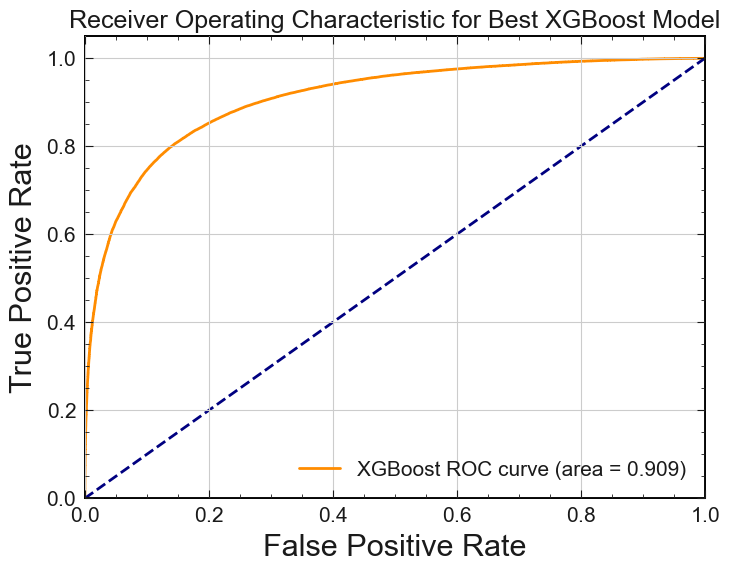

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_prob_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XGBoost ROC curve (area = {roc_auc_xgb:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Best XGBoost Model')
plt.legend(loc='lower right')
plt.grid(True)

# Uncomment the following lines to save the plot
# save_path = '~/PLOTS/XGBoost/240919_ROC_xgb.png'
# save_path_full = os.path.expanduser(save_path)
# plt.savefig(save_path_full)
plt.savefig("MC15rd_etapip_pipipi_K_roc_loose_v2.png")

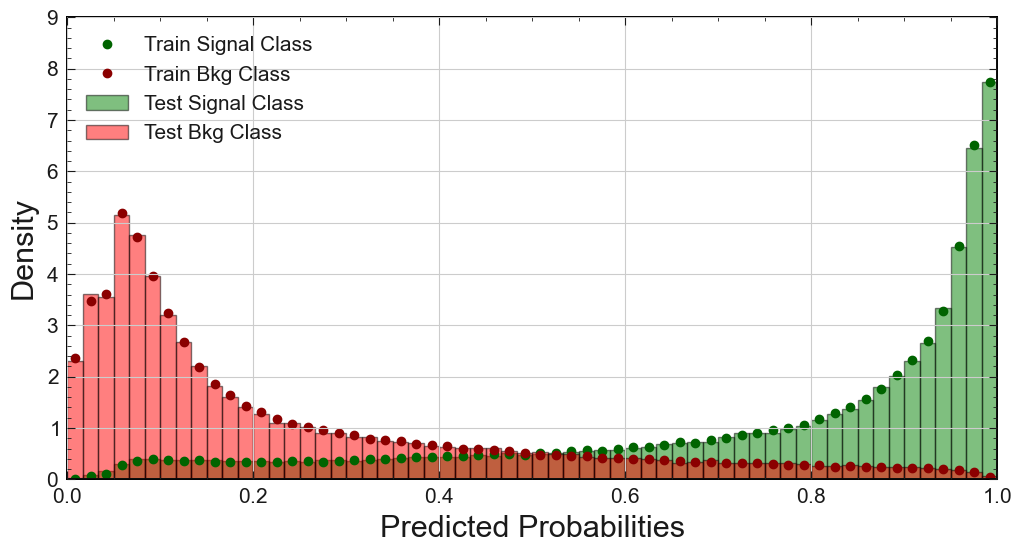

In [26]:
# Get predicted probabilities
y_train_probs = best_xgb_model.predict_proba(X_train)[:, 1]
y_test_probs = best_xgb_model.predict_proba(X_test)[:, 1]

import matplotlib.pyplot as plt
import numpy as np

# Function to plot histograms for train (as points) and test (as bars)
def plot_probability_histograms(y_train_true, y_train_probs, y_test_true, y_test_probs):
    plt.figure(figsize=(12, 6))
    
    # Define a common set of bins for both train and test
    bins = np.linspace(0, 1, 61)  # 60 bins from 0 to 1 for predicted probabilities

    # Test set: Plot histograms as bars
    plt.hist(y_test_probs[y_test_true == 1], bins=bins, alpha=0.5, label='Test Signal Class', color='green', edgecolor='black', density=True)
    plt.hist(y_test_probs[y_test_true == 0], bins=bins, alpha=0.5, label='Test Bkg Class', color='red', edgecolor='black', density=True)

    # Train set: Calculate histogram values for points
    hist_train_pos, _ = np.histogram(y_train_probs[y_train_true == 1], bins=bins, density=True)
    hist_train_neg, _ = np.histogram(y_train_probs[y_train_true == 0], bins=bins, density=True)

    # Calculate the bin centers (to place the points in the middle of each bin)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])

    # Plot the train set histograms as points
    plt.plot(bin_centers, hist_train_pos, 'o', label='Train Signal Class', color='darkgreen')
    plt.plot(bin_centers, hist_train_neg, 'o', label='Train Bkg Class', color='darkred')

    # Labels, title, and legend
    plt.xlabel('Predicted Probabilities')
    plt.ylabel('Density')
    plt.legend(loc='best')
    plt.grid(True)
    plt.xlim(0,1)

# Calculate predicted probabilities for the training and test sets
y_train_probs = best_xgb_model.predict_proba(X_train)[:, 1]
y_test_probs = best_xgb_model.predict_proba(X_test)[:, 1]

# Plot histograms with train set as points and test set as bars
plot_probability_histograms(
    y_train, y_train_probs,
    y_test, y_test_probs
)

# save_path = '~/PLOTS/HBDT/240919_outputs_momentum_sum.png'
# save_path_full = os.path.expanduser(save_path)

# plt.savefig(save_path_full)
plt.savefig("MC15rd_train_test_etapip_pipipi_K_loose_v2.png")
plt.show()

In [27]:
base_path = "/share/storage/jykim/storage_b2/storage/reduced_ntuples/MC15rd/etapip_eteeta/MC15rd_etaetapip_loose_v2_241115_MC15rd_weight_q_s"
cm_elements = ["15rd_eta_e7_18_4S_v3", "15rd_eta_e20_b26_v1", "15rd_eta_e20_e26_4S_v2", "15rd_eta_e21_5S_scan_v1", "15rd_eta_mori_off_v1"]

file_list = []
for element in cm_elements:
    pattern = f"{base_path}/{element}/*.root"
    file_list += glob.glob(pattern)


dataframes = []

# Process each file
for file_name in file_list:
    # Load the ROOT file and tree
    file = uproot.open(file_name)
    tree = file["etapip_pipipi_K"]

    # Specify the branches you want to extract
    branches = ['Pip_pionID','Dp_Psum','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum','Pip_dr',"Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan",]  # Replace with actual branch names

    # Convert the selected branches to a Pandas DataFrame
    df_temp = tree.arrays(branches, library="pd")
    # df_temp = tree.arrays(library="pd")

    # Append the DataFrame to the list
    dataframes.append(df_temp)

# Concatenate all DataFrames into a single DataFrame
df_bkg_apply = pd.concat(dataframes, ignore_index=True)


In [28]:
df_bkg_apply = df_bkg_apply.query('Pip_pionID<0.01')

In [29]:
# Separate signal and background data
df_isSignal_true = df_bkg_apply.query('Dp_isSignal==1')
df_isSignal_false = df_bkg_apply.query('Dp_isSignal!=1')


In [30]:
df_isSignal_false

,Pip_pionID,Dp_Psum,Pip_genMotherID,etapip_Eta_genMotherID,Pip_genMotherPDG,etapip_Eta_genMotherPDG,Dp_cosHelicityAngleMomentum,Pip_dr,Dp_isSignal,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,Pip_p,Dp_CMS_p,etapip_Eta_p,CFT_prob,Dp_M,num_Dstar_no_nan
1,4.662581e-24,3.080705,5.0,12.0,-313.0,-421.0,-0.771452,0.002245,0.0,-0.972846,0.588544,3.295171,2.492161,0.759277,2.033190,-1.0
2,4.662581e-24,2.731825,5.0,6.0,-313.0,-413.0,-0.727180,0.002245,0.0,-0.973285,0.588544,2.964250,2.143281,0.748373,1.893708,-1.0
3,1.502097e-05,3.242934,9.0,0.0,421.0,0.0,0.682071,0.003907,0.0,-0.963838,2.465991,2.683783,0.776943,0.005411,1.714009,-1.0
4,9.293776e-23,2.696497,19.0,0.0,-313.0,0.0,-0.783668,0.011589,0.0,0.999957,0.502699,3.329099,2.193799,0.069225,1.635630,-1.0
5,3.479459e-03,2.942235,17.0,2.0,-10323.0,23.0,-0.073166,0.009408,0.0,0.991497,1.366554,2.852239,1.575680,0.093564,1.645296,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624814,2.581990e-10,4.119900,2.0,2.0,23.0,23.0,-0.887161,0.003660,0.0,-0.997140,0.509621,3.508992,3.610279,0.022996,1.783329,-1.0
1624815,7.451022e-07,4.317794,2.0,2.0,23.0,23.0,-0.642972,0.000245,0.0,-0.982959,1.004801,3.212691,3.312994,0.809408,1.844853,-1.0
1624816,8.924539e-06,4.623025,2.0,2.0,23.0,23.0,-0.905318,0.005157,0.0,-0.999896,0.486485,3.350489,4.136540,0.235494,1.939080,-1.0
1624818,1.196405e-04,2.535337,2.0,2.0,23.0,23.0,-0.523759,0.000477,0.0,0.831500,0.756591,2.577116,1.778746,0.135510,1.658669,-1.0


In [31]:
# Drop the specified columns, but keep 'Dp_M' for reference
columns_to_drop = ['Pip_pionID','Dp_CMS_p','CFT_prob','etapip_Eta_p','Pip_p','num_Dstar_no_nan','Dp_M','Pip_genMotherID', 'etapip_Eta_genMotherID', 'Pip_genMotherPDG', 'Dp_isSignal', 'etapip_Eta_genMotherPDG']
df_isSignal_true_dropped = df_isSignal_true.drop(columns=columns_to_drop)
df_isSignal_false_dropped = df_isSignal_false.drop(columns=columns_to_drop)


In [32]:
df_isSignal_true_dropped

,Dp_Psum,Dp_cosHelicityAngleMomentum,Pip_dr,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane
649,4.597023,0.075892,0.034770,0.999994
682,3.644482,-0.060508,0.021049,0.999997
1334,3.197576,-0.089972,0.022247,0.999998
1360,4.483909,0.781285,0.007145,0.999988
1418,4.413187,-0.816577,0.008267,0.999937
...,...,...,...,...
1540400,3.531724,-0.823440,0.007733,0.999944
1540668,3.697708,0.005818,0.006027,0.997547
1541349,3.353073,0.488441,0.021907,0.999859
1541755,4.674212,-0.243685,0.002611,0.999585


In [33]:
# Reorder the columns of df_isSignal_true_dropped and df_isSignal_false_dropped to match the training data's feature order
df_isSignal_true_dropped = df_isSignal_true_dropped[best_xgb_model.get_booster().feature_names]
df_isSignal_false_dropped = df_isSignal_false_dropped[best_xgb_model.get_booster().feature_names]

# Now try to predict probabilities
isSignal_true_probabilities = best_xgb_model.predict_proba(df_isSignal_true_dropped)
df_isSignal_true_dropped['prob_signal'] = isSignal_true_probabilities[:, 1]

isSignal_false_probabilities = best_xgb_model.predict_proba(df_isSignal_false_dropped)
df_isSignal_false_dropped['prob_signal'] = isSignal_false_probabilities[:, 1]


In [34]:
# Optionally, you can combine the datasets back with 'Dp_M' if needed
df_isSignal_true_combined = pd.merge(df_isSignal_true, df_isSignal_true_dropped[['prob_signal']], left_index=True, right_index=True)
df_isSignal_false_combined = pd.merge(df_isSignal_false, df_isSignal_false_dropped[['prob_signal']], left_index=True, right_index=True)


In [35]:
# Prepare the data
df_combined_all_range = pd.concat([df_isSignal_true_combined, df_isSignal_false_combined], ignore_index=True)

df_combined_all_range['Dp_isSignal'] = df_combined_all_range['Dp_isSignal'].fillna(0)

In [36]:
# df_combined_all_range = df_combined_all_range.query('num_Dstar_no_nan-1000')

In [37]:
df_combined_all_range.columns.tolist()

['Pip_pionID',
 'Dp_Psum',
 'Pip_genMotherID',
 'etapip_Eta_genMotherID',
 'Pip_genMotherPDG',
 'etapip_Eta_genMotherPDG',
 'Dp_cosHelicityAngleMomentum',
 'Pip_dr',
 'Dp_isSignal',
 'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',
 'Pip_p',
 'Dp_CMS_p',
 'etapip_Eta_p',
 'CFT_prob',
 'Dp_M',
 'num_Dstar_no_nan',
 'prob_signal']

In [38]:
df_combined = df_combined_all_range.query('Dp_M>1.85 & Dp_M<1.885')
#signal MC fitting region
# df_combined = df_combined_all_range.query('Dp_M>1.76 & Dp_M<1.96')

In [39]:
unique_values = df_combined['Dp_isSignal'].unique()
print(unique_values)

[1. 0.]


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


Best cut value: 0.92
Best figure of merit: 8.708426171848306


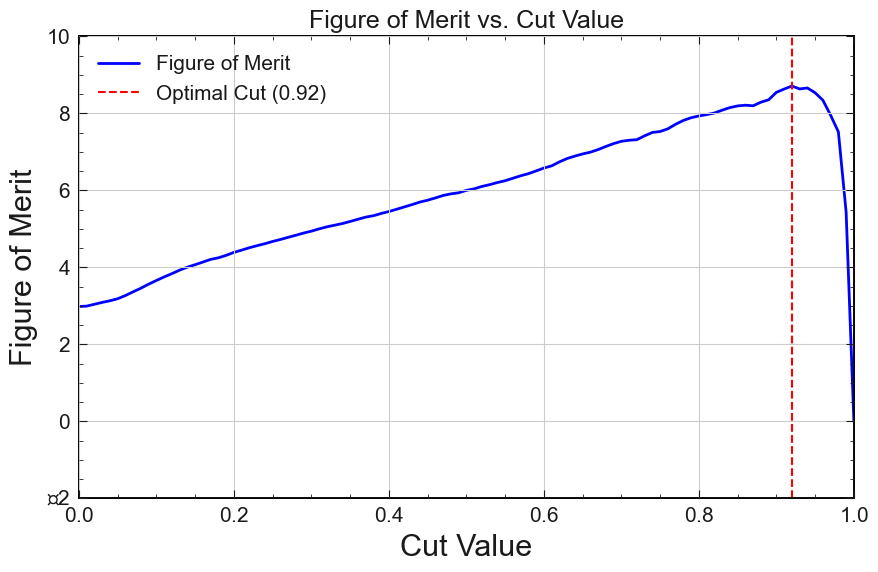

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

scale = 1/4
# Define the figure of merit function using query
def figure_of_merit(df, cut_value):
    df_cut = df.query('prob_signal > @cut_value')
    Nsig = (df_cut['Dp_isSignal'] == 1).sum()
    Nbkg = (df_cut['Dp_isSignal'] != 1).sum()
    if Nsig + Nbkg == 0:
        return 0
    return Nsig*scale / np.sqrt(Nsig*scale + Nbkg*scale)
# def figure_of_merit(df, cut_value):
#     df_cut = df.query('prob_signal > @cut_value')
#     Nsig = (df_cut['Dp_isSignal'] == 1).sum()
#     Nbkg = (df_cut['Dp_isSignal'] != 1).sum()
#     if Nsig + Nbkg == 0:
#         return 0
#     return Nsig / np.sqrt(Nsig + Nbkg)
# Define range of cut values to test
cut_values = np.linspace(0, 1, 101)  # You can adjust the range and granularity

# Calculate figure of merit for each cut value
figures_of_merit = [figure_of_merit(df_combined, cut) for cut in cut_values]

# Find the best cut value
best_cut = cut_values[np.argmax(figures_of_merit)]
best_fom = max(figures_of_merit)

# Print the best cut value and corresponding figure of merit
print(f'Best cut value: {best_cut}')
print(f'Best figure of merit: {best_fom}')

# Plot figure of merit vs. cut value
plt.figure(figsize=(10, 6))
plt.plot(cut_values, figures_of_merit, color='blue', label='Figure of Merit', linewidth=2)
plt.axvline(x=best_cut, color='red', linestyle='--', label=f'Optimal Cut ({best_cut:.2f})')
plt.xlabel('Cut Value')
plt.ylabel('Figure of Merit')
plt.title('Figure of Merit vs. Cut Value')
plt.xlim(0,1)
plt.legend()
plt.grid(True)
plt.savefig("MC15rd_etapip_pipipi_K_FOM_loose_v2.png")

plt.show()

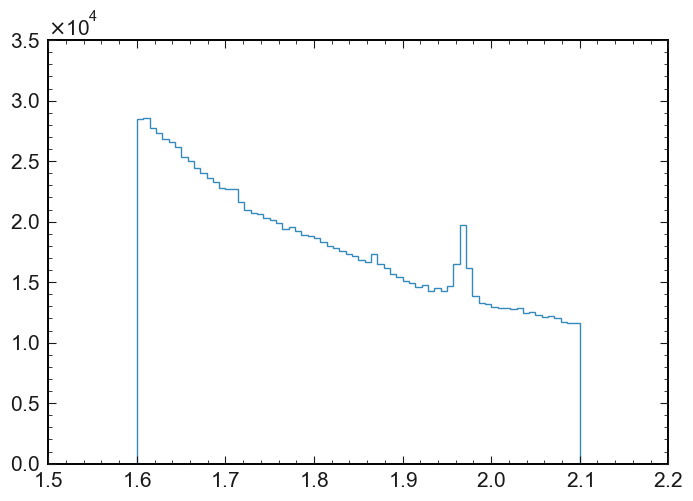

In [41]:
plt.hist(df_combined_all_range['Dp_M'],bins=np.linspace(1.6,2.1,71),histtype='step');

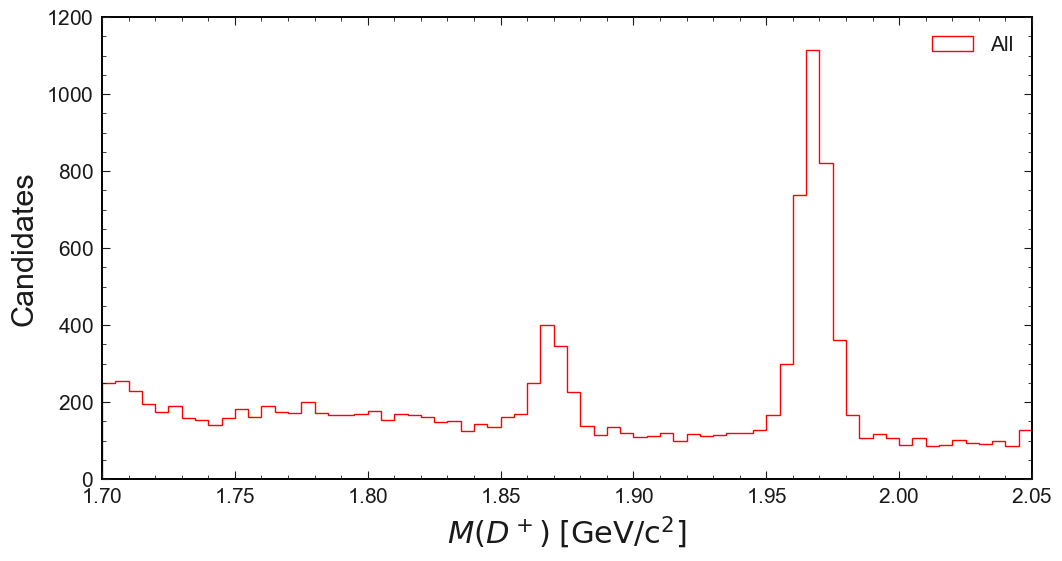

nsig=742
nsig=185.5


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume df_combined and best_cut are already defined
# For example purposes, I'll include a placeholder for df_combined
# df_combined = pd.read_csv('your_data.csv')  # Load your data here

# Define the optimal cut (replace with the actual value from your previous code)
optimal_cut = best_cut

# Separate the dataframe based on the optimal cut
df_signal = df_combined_all_range.query('prob_signal > @optimal_cut')
# Create histograms
plt.figure(figsize=(12, 6))

# Histogram for signal
plt.hist(df_signal['Dp_M'], bins=np.linspace(1.7, 2.05, 71), histtype='step', color='red', label='All')

# Histogram for background
# plt.hist(df_background['Dp_M'], bins=np.linspace(1.6, 2.1, 71), histtype='step', color='red', label='Background')

plt.xlabel('Dp_M')
plt.ylabel('Candidates')
# plt.title('Histogram of Dp_M for Signal and Background')
plt.legend()

# plt.grid(True)
plt.xlim(1.7,2.05)
plt.xlabel(r'$M(D^+) \; [\mathrm{GeV/c^2}]$')

plt.savefig("MC15rd_etapip_pipipi_K_Dp_M_all_loose_v2.png")

plt.show()


scale = 1/4
df_signal_matched_true = df_signal.query('Dp_isSignal==1')
print(f'nsig={len(df_signal_matched_true)}')
print(f'nsig={len(df_signal_matched_true)*scale}')

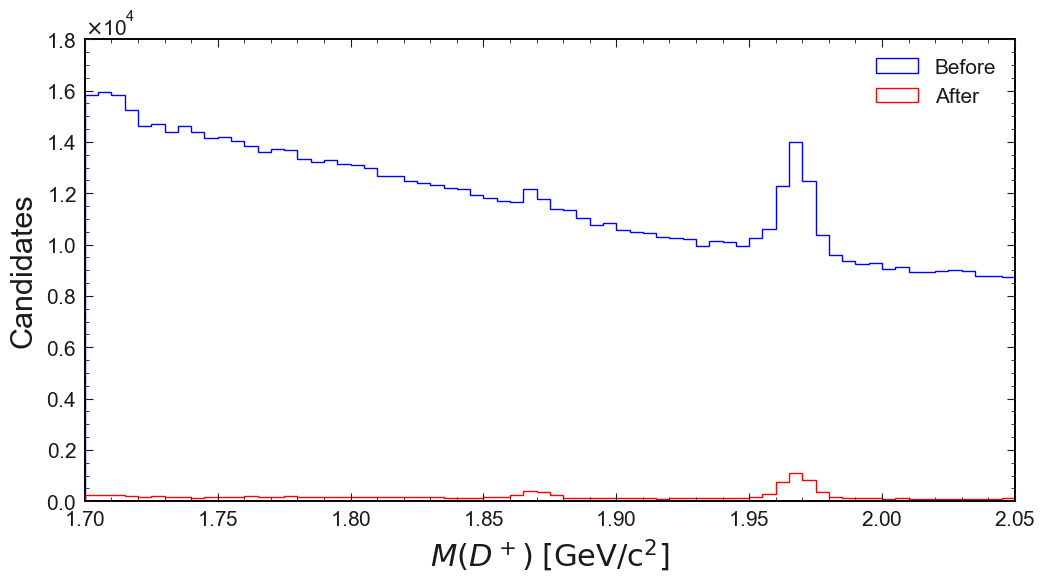

n_before=1268221
n_after=20628
cut eff=0.01626530391785028


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume df_combined and best_cut are already defined
# For example purposes, I'll include a placeholder for df_combined
# df_combined = pd.read_csv('your_data.csv')  # Load your data here

# Define the optimal cut (replace with the actual value from your previous code)
optimal_cut = best_cut

# Separate the dataframe based on the optimal cut
df_signal = df_combined_all_range.query('prob_signal > 0')
df_background = df_combined_all_range.query('prob_signal > @optimal_cut')

# Create histograms
plt.figure(figsize=(12, 6))

# Histogram for signal
plt.hist(df_signal['Dp_M'], bins=np.linspace(1.7, 2.05, 71), histtype='step', color='blue', label='Before')

# Histogram for background
plt.hist(df_background['Dp_M'], bins=np.linspace(1.7, 2.05, 71), histtype='step', color='red', label='After')

plt.xlabel('Dp_M')
plt.ylabel('Candidates')
# plt.title('Histogram of Dp_M for Signal and Background')
plt.legend()

# plt.grid(True)

plt.xlabel(r'$M(D^+) \; [\mathrm{GeV/c^2}]$')
plt.xlim(1.7,2.05)
plt.savefig("MC15rd_etapip_pipipi_K_Dp_M_before_loose_v2.png")

plt.show()



print(f'n_before={len(df_signal)}')
print(f'n_after={len(df_background)}')
print(f'cut eff={len(df_background)/len(df_signal)}')

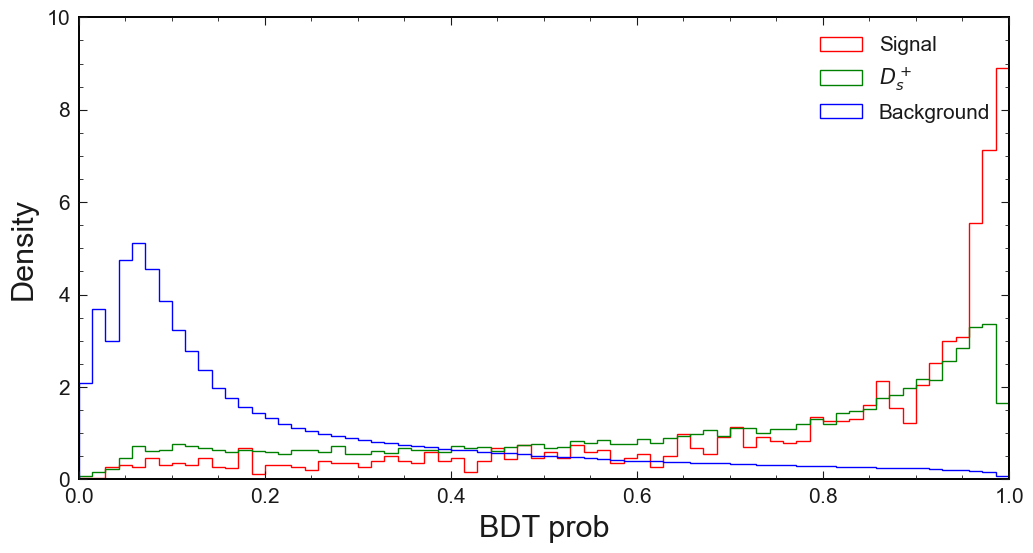

nsig=1778


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Separate the dataframe based on the optimal cut
df_signal = df_combined_all_range.query('Dp_isSignal==1')
df_background = df_combined_all_range.query('Dp_isSignal!=1 & (Pip_genMotherID!=etapip_Eta_genMotherID) | abs(Pip_genMotherPDG)!=431 | abs(etapip_Eta_genMotherPDG)!=431')
df_background_Ds = df_combined_all_range.query('Dp_isSignal!=1 & (Pip_genMotherID==etapip_Eta_genMotherID) & abs(Pip_genMotherPDG)==431 & abs(etapip_Eta_genMotherPDG)==431')

# Create histograms
plt.figure(figsize=(12, 6))

# Histogram for signal
plt.hist(df_signal['prob_signal'], bins=np.linspace(0,1, 71), histtype='step', color='red', label='Signal',density=True)
plt.hist(df_background_Ds['prob_signal'], bins=np.linspace(0,1, 71), histtype='step', color='green', label='$D_s^+$',density=True)

# Histogram for background
plt.hist(df_background['prob_signal'], bins=np.linspace(0,1, 71), histtype='step', color='blue', label='Background',density=True)

plt.xlabel('BDT prob')
plt.ylabel('Density')
# plt.title('Histogram of Dp_M for Signal and Background')
plt.legend()

# plt.grid(True)
plt.xlim(0,1)
plt.savefig("MC15rd_etapip_pipipi_K_BDT_output_Dp_Ds_bkg_loose_v2.png")

plt.show()


print(f'nsig={len(df_signal)}')